# NSW AirBNB

Olivia Xiao

z5478864

Sydney AirBNB dataset sourced from Inside AirBNB

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 5)
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to
listings_data = pd.read_csv("listings.csv")
filepath = "listings.csv"
print("done")

done


In [2]:
listings_data.shape

(22659, 75)

How many columns and rows

In [3]:
listings_data = pd.read_csv(
    filepath,
    infer_datetime_format=True,
    parse_dates=["host_since"],
    dayfirst=True,
)

date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(listings_data.host_since.min(), date_format_pattern)
latest_date = datetime.strftime(listings_data.host_since.max(), date_format_pattern)
f"range is: {earliest_date} to {latest_date}"

'range is: June, 2009 to March, 2023'

this data set includes hosts since 2009 all the way to 2023

MadeComfy                           232
David                               221
L'Abode Accommodation Specialist    175
Ken                                 161
Michael                             153
                                   ... 
Brayan                                1
Anne-Lise                             1
Hui                                   1
Miria                                 1
Edin                                  1
Name: host_name, Length: 5397, dtype: int64


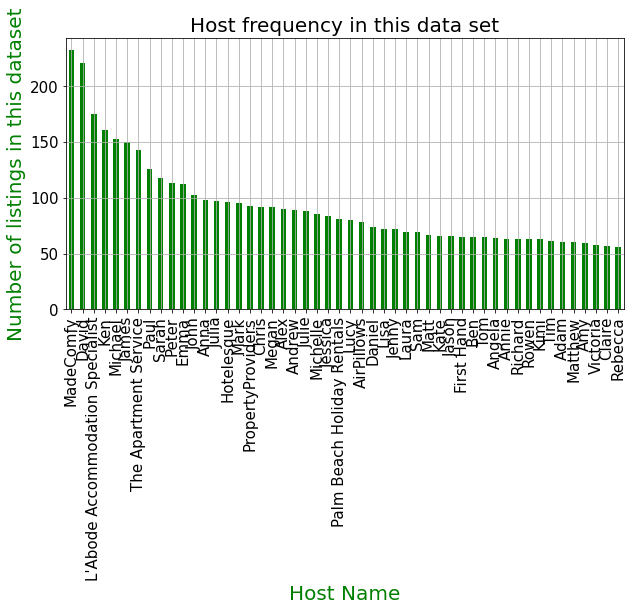

In [4]:
matplotlib.rcParams.update(
    saved_style_state)

hnc = listings_data["host_name"].value_counts()
print(hnc)

hnc[hnc > 55].plot(color = "green", kind="bar", fontsize = 15)
plt.xlabel("Host Name", fontsize = 20, color = "green")
plt.ylabel("Number of listings in this dataset", fontsize = 20, color = "green")
plt.title("Host frequency in this data set", fontsize = 20)
plt.grid(True)

In [5]:
made_comfy = listings_data.iloc[3493]
made_comfy.host_listings_count

951.0

AirBNB management service MadeComfy has the largest amount of listings. In this dataset they have 232 listings in Sydney, all up, they have 951 listings.

In [6]:
a = listings_data["host_location"].value_counts()
print(a)

Sydney, Australia                        5554
New South Wales, Australia               1974
Bondi Beach, Australia                    548
Australia                                 445
Manly, Australia                          377
                                         ... 
Prahran, Australia                          1
Saint-Maximin-la-Sainte-Baume, France       1
Tongyeong-si, South Korea                   1
Susegana, Italy                             1
Tanunda, Australia                          1
Name: host_location, Length: 1057, dtype: int64


Further analysis into international hosts.

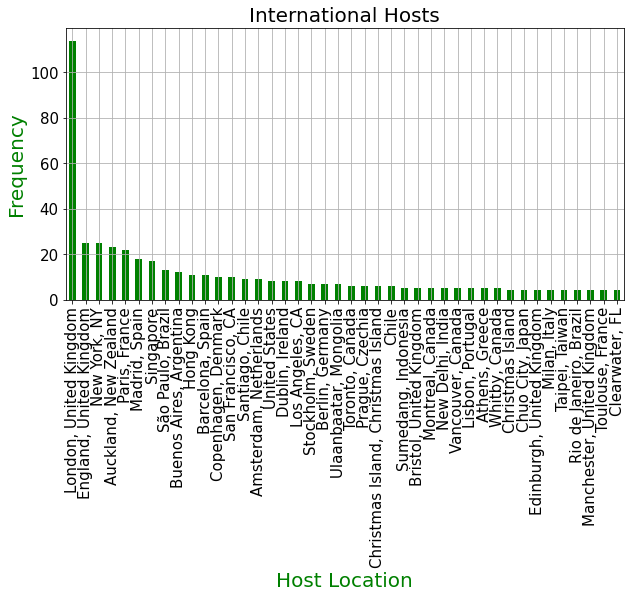

In [7]:
international_hosts = listings_data.loc[(listings_data["host_location"].str.count("Australia") < 1)]
count = international_hosts["host_location"].value_counts()
count[count > 3].plot(color = "green", kind="bar", fontsize = 15)
plt.xlabel("Host Location", fontsize = 20, color = "green")
plt.ylabel("Frequency", fontsize = 20, color = "green")
plt.title("International Hosts", fontsize = 20)
plt.grid(True)

Majority of hosts are from Australia, but there are still many overseas hosts.

/var/folders/h7/2f3zxpvd1q5ddv0m_sjf33vm0000gn/T/ipykernel_15193/3523687320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  international_hosts['host_since'] = pd.to_datetime(international_hosts['host_since'])


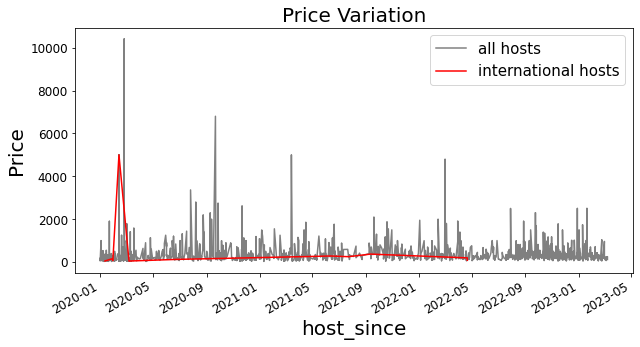

In [8]:
listings_data['host_since'] = pd.to_datetime(listings_data['host_since'])
listings_data_2020_onwards = listings_data.loc[listings_data['host_since'].dt.year >= 2020]

international_hosts['host_since'] = pd.to_datetime(international_hosts['host_since'])
international_hosts_2020_onwards = international_hosts.loc[international_hosts['host_since'].dt.year >= 2020]

fig, ax = plt.subplots()
listings_data_2020_onwards.plot(x='host_since', y=' price ', ax=ax, label = 'all hosts', color = 'grey', fontsize = 12)
international_hosts_2020_onwards.plot(x='host_since', y=' price ', ax=ax, label='international hosts', color='red', fontsize = 12)
ax.legend(prop={'size':15})
plt.xlabel("host_since", fontsize = 20)
plt.ylabel("Price", fontsize = 20)
plt.title("Price Variation", fontsize = 20)
plt.show()

Far less variations in price for airbnbs with international hosts, prices are generally below $1000 a night

Note: less data points for listings owned by international hosts.

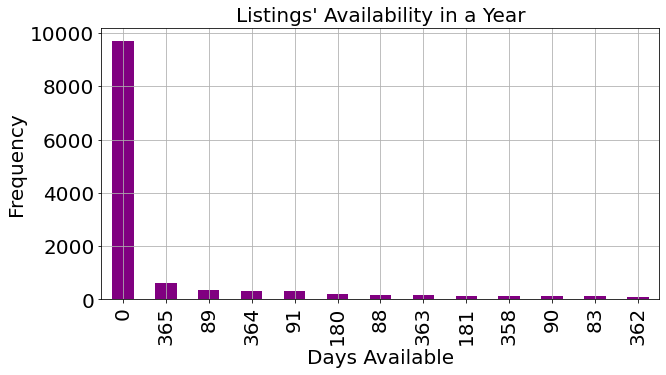

In [9]:
listings_data["availability_365"].value_counts()[listings_data["availability_365"].value_counts() > 100].plot(kind='bar', color = "purple", fontsize = 20)
plt.xlabel("Days Available", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)
plt.title("Listings' Availability in a Year", fontsize = 20)
plt.grid(True)

9712 listings have 0 availabily throughout the whole year.

In [10]:
import geopandas as gp
import shapely
import fiona

shp_file_name = "/Users/oliviaxiao/1161/data_project/maps/GDA2020/nsw_localities.shp"
zip_file_name = "maps/nsw_locality_polygon_shp.zip"
web_file_path = (
    "https://data.gov.au/data/dataset/"
    "91e70237-d9d1-4719-a82f-e71b811154c6/resource/"
    "5e295412-357c-49a2-98d5-6caf099c2339/download/"
    "nsw_locality_polygon_shp.zip"
)

In [11]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()
if os.path.isfile(shp_file_name):
    print("loading from file")
else:
    if os.path.isfile(zip_file_name):
        print("unzipping")
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print("loading from the internet")
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print("done")

loading from file
done


/Users/oliviaxiao/Library/Python/3.9/lib/python/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'NSW Listings')

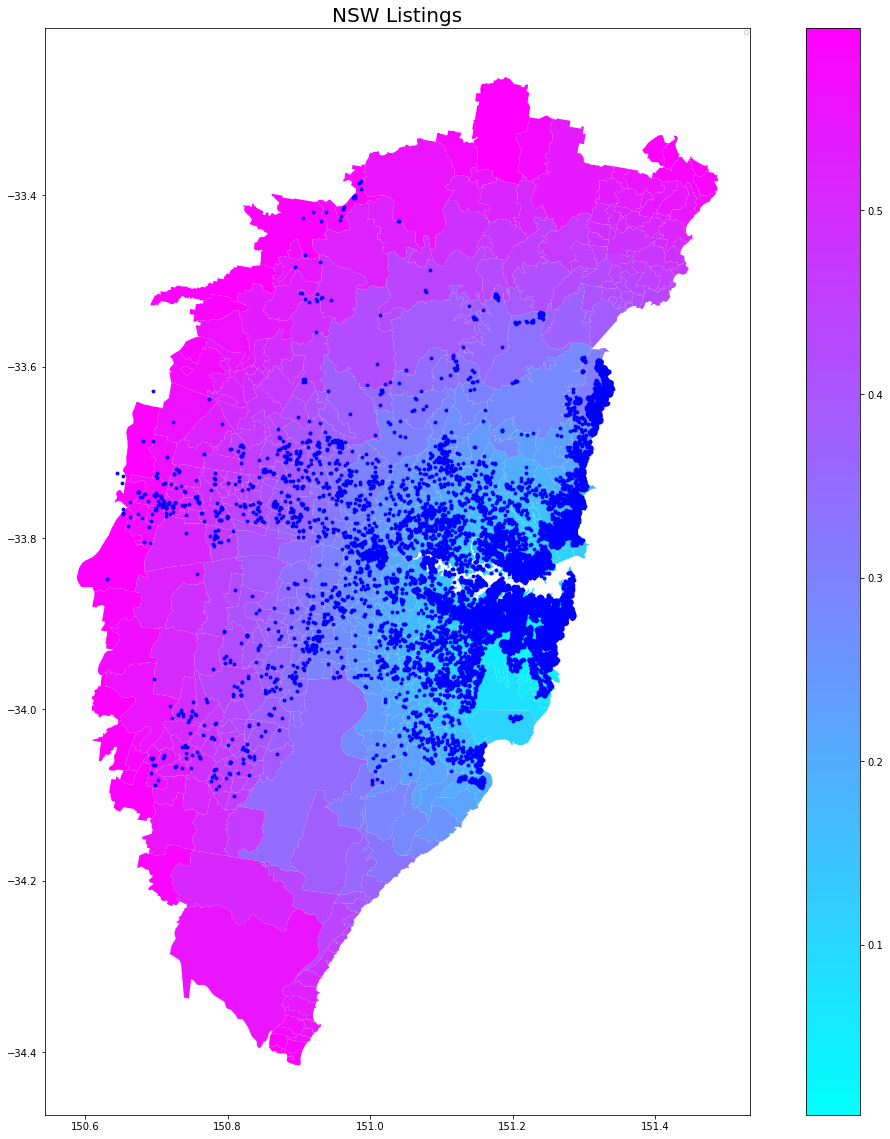

In [12]:
from shapely.geometry import Point

burbs = gp.GeoDataFrame.from_file(shp_file_name)
burbs.set_crs(epsg=5234, inplace=True, allow_override=True) 
cols_to_drop = ["NSW_LOCA_1", "NSW_LOCA_3", "NSW_LOCA_4","NSW_LOCA_5","NSW_LOCA_7", "DT_RETIRE"]
burbs.drop(cols_to_drop, axis=1, inplace=True, errors="ignore")

right_here = shapely.geometry.point.Point(151.2299732, -33.9178754)
burbs["distance_from_UNSW"] = burbs.centroid.distance(right_here)

crs = {'init':'epsg:4326'}

really_close_burbs = burbs[burbs.distance_from_UNSW < 0.6]

geometry = [Point(xy) for xy in zip(listings_data['longitude'], listings_data['latitude'])]
geo_data = gp.GeoDataFrame(listings_data, crs = crs, geometry = geometry)

fig, ax = plt.subplots(figsize=(20,20))
really_close_burbs.plot(column='distance_from_UNSW', cmap='cool', legend=True, ax=ax)
geo_data.plot(ax=ax, markersize=8, color='blue', marker='o')
plt.legend(prop={'size':5})
plt.title("NSW Listings", fontsize = 20)


Comparison with listings owned by international hosts.

/Users/oliviaxiao/Library/Python/3.9/lib/python/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Text(0.5, 1.0, 'NSW Listings')

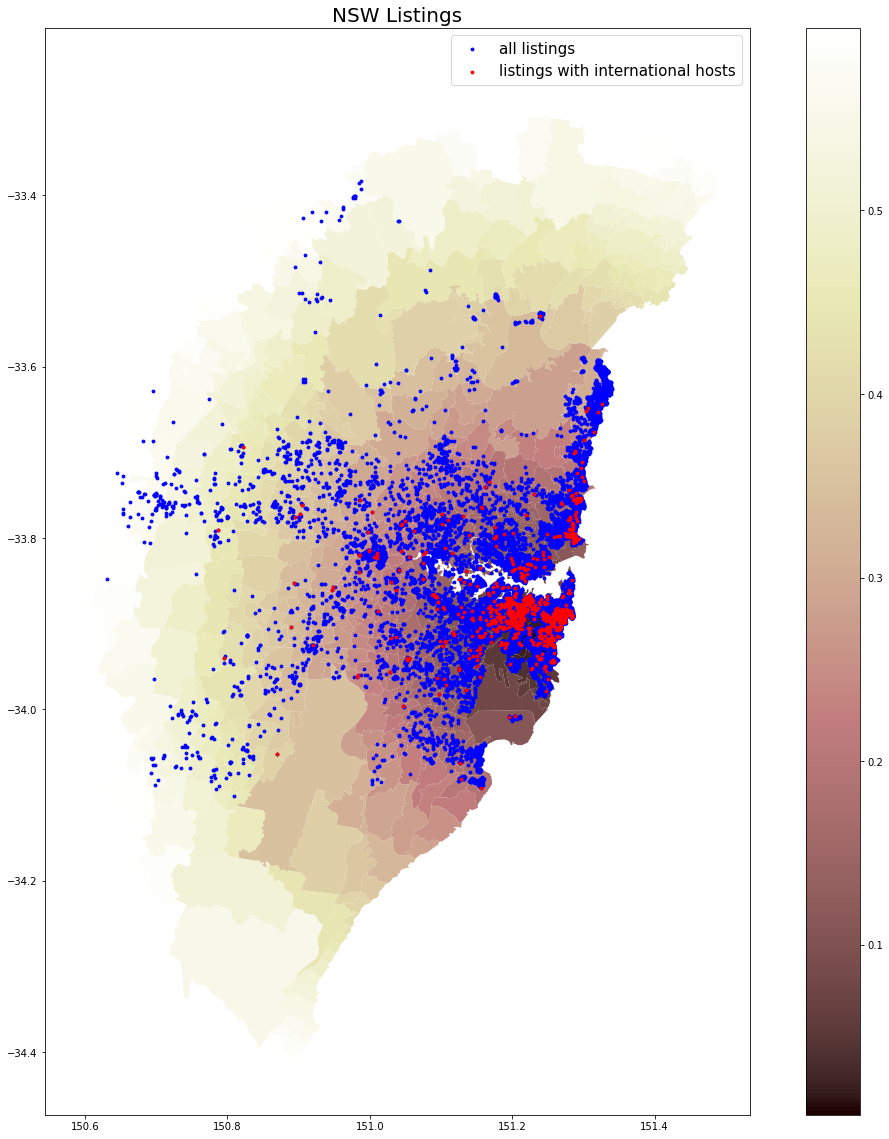

In [13]:
geometry = [Point(xy) for xy in zip(international_hosts['longitude'], international_hosts['latitude'])]
international_geo = gp.GeoDataFrame(international_hosts, crs = crs, geometry = geometry)

fig, ax = plt.subplots(figsize=(20,20))
really_close_burbs.plot(column='distance_from_UNSW', cmap='pink', legend=True, ax=ax)
geo_data.plot(ax=ax, markersize=8, color='blue', marker='o', label = 'all listings')
international_geo.plot(ax=ax, markersize=8, color='red', marker='o', label = 'listings with international hosts')
plt.legend(prop={'size':15})
plt.title("NSW Listings", fontsize = 20)

/Users/oliviaxiao/Library/Python/3.9/lib/python/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/oliviaxiao/Library/Python/3.9/lib/python/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Text(0.5, 1.0, 'Sydney, Waverley, Randwick, North Sydney, Woolahra, Mosman Listings')

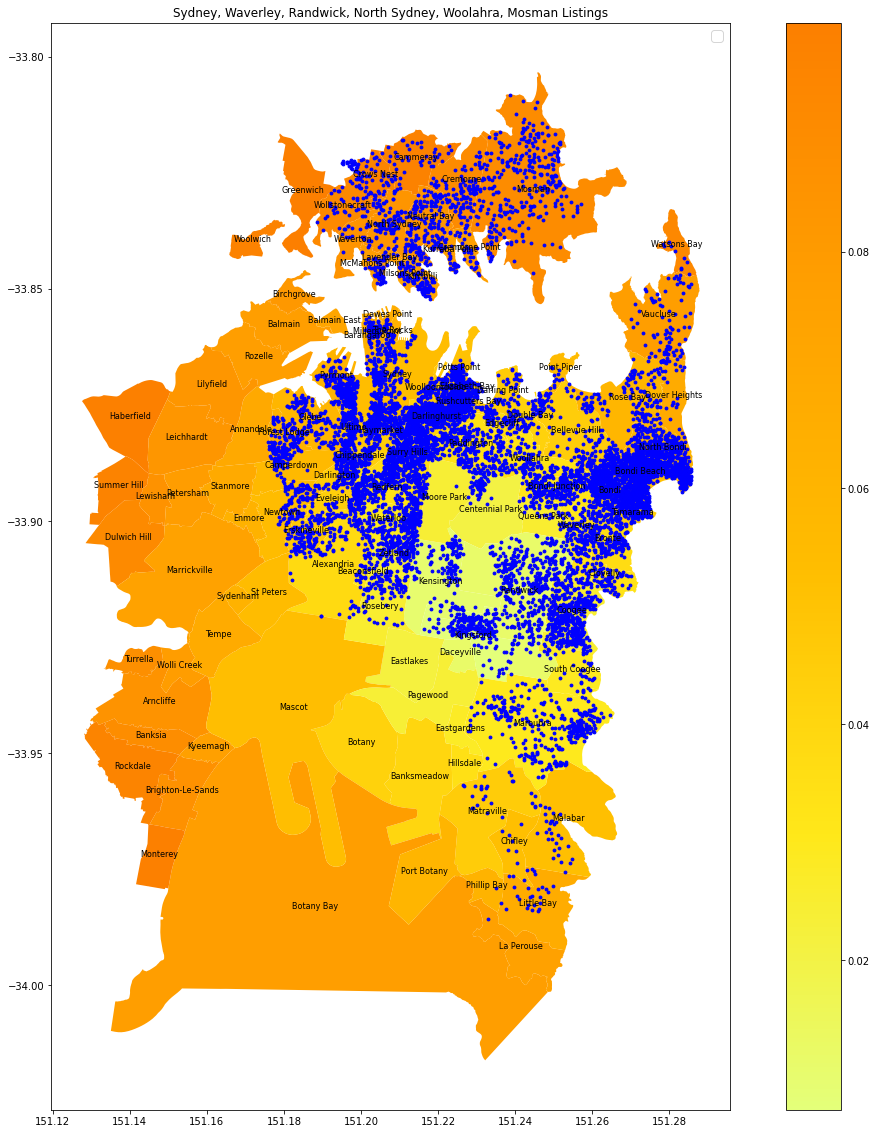

In [14]:
sydney = listings_data[listings_data['neighbourhood_cleansed'].str.contains('Sydney|Waverley|Randwick|North Sydney|Woollahra|Mosman')]

geometry = [Point(xy) for xy in zip(sydney['longitude'], sydney['latitude'])]
sydney_geo = gp.GeoDataFrame(sydney, crs = crs, geometry = geometry)

really_close_burbs = burbs[burbs.distance_from_UNSW < 0.1]

fig, ax = plt.subplots(figsize=(20,20))
really_close_burbs.plot(column='distance_from_UNSW', cmap='Wistia', legend=True, ax=ax)
sydney_geo.plot(ax=ax, markersize=8, color='blue', marker='o',)
plt.legend(prop={'size':15})

def add_centroid(row):
    return row.geometry.centroid
really_close_burbs["centroid"] = really_close_burbs.apply(add_centroid, axis=1)
a = really_close_burbs.iloc[0]
a.centroid

for idx, row in really_close_burbs.iterrows():
    plt.annotate(text=row.LOC_NAME, 
                 xy=tuple(row.centroid.coords)[0],
                 xycoords="data",
                 horizontalalignment='center',
                 fontsize = 8)

plt.title("Sydney, Waverley, Randwick, North Sydney, Woolahra, Mosman Listings", fontsize = 12)

new data frame with only listings in area classified as Sydney, Waverley, Randwick, North Sydney, Woolahra, and Mosman. The InsideAirBNB defines 'Sydney' as CBD and inner city suburbs.

/Users/oliviaxiao/Library/Python/3.9/lib/python/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/oliviaxiao/Library/Python/3.9/lib/python/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Text(0.5, 1.0, 'Sydney, Waverley, Randwick, North Sydney, Woolahra, Mosman Listings')

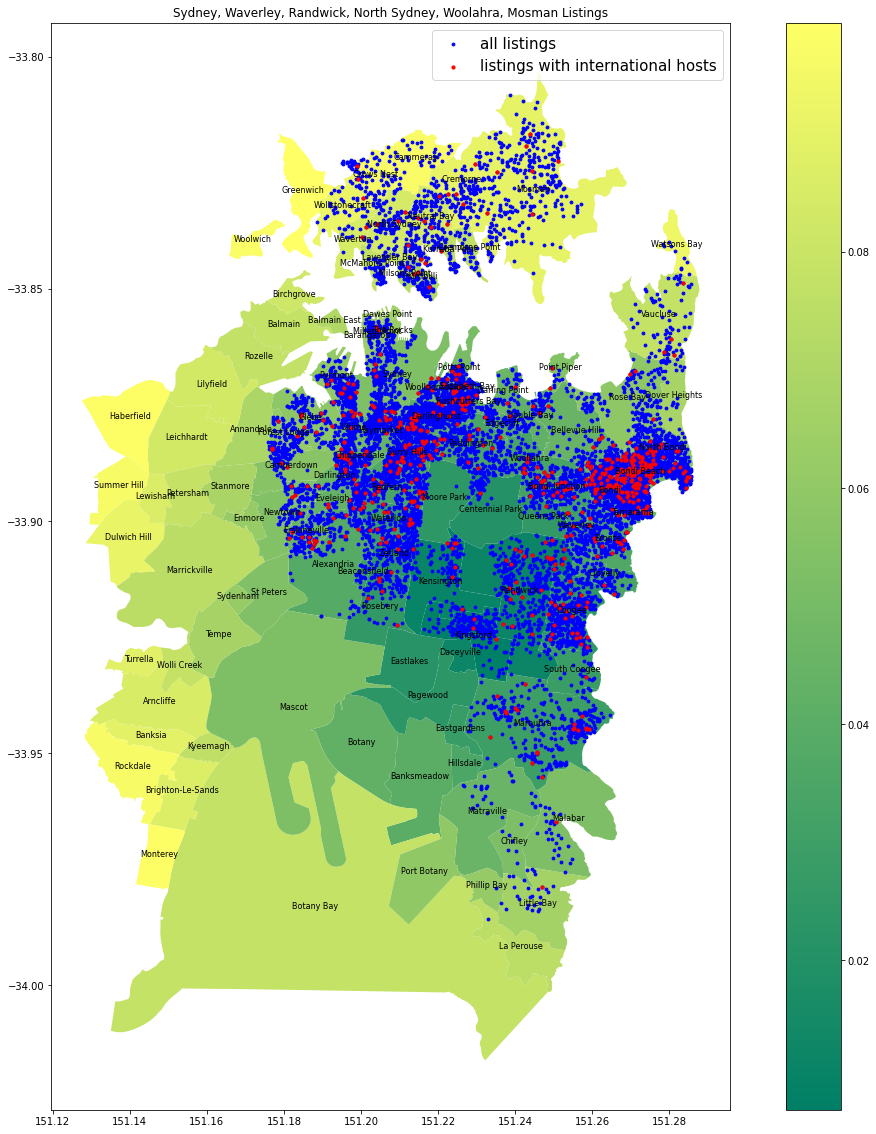

In [15]:
sydney_international = sydney.loc[(sydney["host_location"].str.count("Australia") < 1)]

geometry = [Point(xy) for xy in zip(sydney_international['longitude'], sydney_international['latitude'])]
sydney_international_geo = gp.GeoDataFrame(sydney_international, crs = crs, geometry = geometry)

fig, ax = plt.subplots(figsize=(20,20))
really_close_burbs.plot(column='distance_from_UNSW', cmap='summer', legend=True, ax=ax)
sydney_geo.plot(ax=ax, markersize=8, color='blue', marker='o', label='all listings')
sydney_international_geo.plot(ax=ax, markersize=10, color='red', marker='o', label='listings with international hosts')
plt.legend(prop={'size':15})

def add_centroid(row):
    return row.geometry.centroid
really_close_burbs["centroid"] = really_close_burbs.apply(add_centroid, axis=1)
a = really_close_burbs.iloc[0]
a.centroid

for idx, row in really_close_burbs.iterrows():
    plt.annotate(text=row.LOC_NAME, 
                 xy=tuple(row.centroid.coords)[0],
                 xycoords="data",
                 horizontalalignment='center',
                 fontsize = 8)

plt.title("Sydney, Waverley, Randwick, North Sydney, Woolahra, Mosman Listings", fontsize = 12)

Majority of international hosts are in Bondi.